<a href="https://colab.research.google.com/github/jambdeep/2025-500-USB/blob/main/Examen/Examen_Parcial_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Cargar librerias para RNA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers




In [2]:
# Cargar archivo
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/2025-IA/penguins.csv'
df = pd.read_csv(file_path)

In [4]:
#Mostrar celdas
df.head()

,Adelie,Torgersen,39.1,18.7,181,3750,Male
0,Adelie,Torgersen,39.5,17.4,186,3800,Female
1,Adelie,Torgersen,40.3,18.0,195,3250,Female
2,Adelie,Torgersen,36.7,19.3,193,3450,Female
3,Adelie,Torgersen,39.3,20.6,190,3650,Male
4,Adelie,Torgersen,38.9,17.8,181,3625,Female


In [5]:
#Asignar nombre a las columnas y solo tomar las que necesitamos, datos numericos y nuestra salida
column_names = ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
df = pd.read_csv(file_path, header=None, names=column_names)

In [6]:
df = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']]

In [7]:
# Guardar el DataFrame en un nuevo archivo CSV
df.to_csv('/content/penguins_procesado.csv', index=False)


In [8]:
from google.colab import files
files.download('/content/penguins_procesado.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
#Mostrar celdas con los cambios ya hechos
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181,3750,Adelie
1,39.5,17.4,186,3800,Adelie
2,40.3,18.0,195,3250,Adelie
3,36.7,19.3,193,3450,Adelie
4,39.3,20.6,190,3650,Adelie


In [10]:
# Normalizar los valores de entrada entre 0 y 1
scaler = MinMaxScaler()

In [11]:
X = scaler.fit_transform(df.drop(columns=['species']))

In [12]:
X[:5]


array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       [0.16727273, 0.73809524, 0.3559322 , 0.20833333],
       [0.26181818, 0.89285714, 0.30508475, 0.26388889]])

In [13]:
#Codificar la variable species
encoder = LabelEncoder()
y = encoder.fit_transform(df['species'])

In [14]:
y = tf.keras.utils.to_categorical(encoder.fit_transform(df['species']))

In [15]:
# Dividir en entrenamiento (60%) y prueba (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [16]:
#Estructura del RNA
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(4,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
#Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Entrenar la RNA
history = model.fit(X_train, y_train, epochs=500, batch_size=8, validation_data=(X_test, y_test))


Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4848 - loss: 1.0387 - val_accuracy: 0.7239 - val_loss: 0.8948
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7295 - loss: 0.8145 - val_accuracy: 0.8060 - val_loss: 0.6374
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7914 - loss: 0.5607 - val_accuracy: 0.8806 - val_loss: 0.4148
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9139 - loss: 0.3700 - val_accuracy: 0.9776 - val_loss: 0.2839
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9563 - loss: 0.2525 - val_accuracy: 0.9851 - val_loss: 0.2078
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9689 - loss: 0.2115 - val_accuracy: 0.9776 - val_loss: 0.1556
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9667 - loss: 0.1334 - val_accuracy: 0.9925 - val_loss: 0.1228
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9797 - loss: 0.1291 - val_accuracy: 0.9851 -

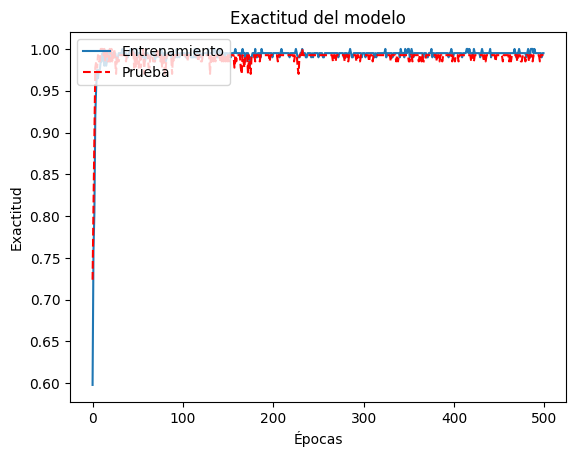

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'r--')
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento','Prueba'], loc='upper left')
plt.show
plt.savefig('figura01.png', dpi=300)

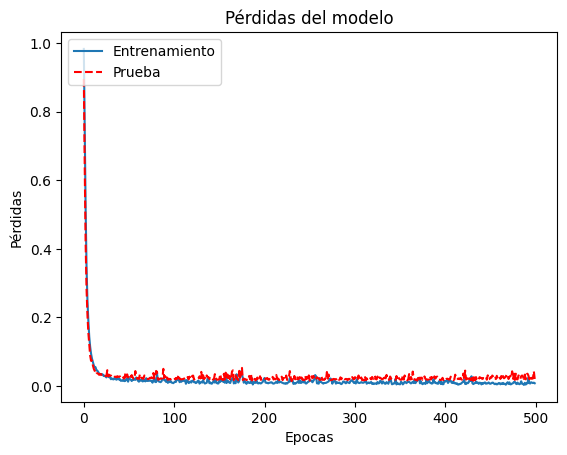

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('Pérdidas del modelo')
plt.ylabel('Pérdidas')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento','Prueba'], loc='upper left')
plt.show
plt.savefig('figura02.png', dpi=300)

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,275 (106.55 KB)

 Trainable params: 9,091 (35.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,184 (71.04 KB)

La red tiene 3 capas porque puede clasificar datos en 3 categorías, tiene un total de 9091 parámetros entrenables.

*   dense: recibe 4 datos de entrada y tiene 128 neuronas (4+1) *128= 640
*   dense_1: recibe las 128 salidas anteriores más las 64 neuronas (128+1)*64=8256


*   dense_2: tiene 3 neuornas porque son las salidas: Adelie, Gentoo, Chinstrap, nos pasa las 64 neuronas anteriores (64+1)*3=195
*   



